In [1]:
%load_ext autoreload
%autoreload 2

import random
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg
import shutil
from os.path import join
from settings import *
from PIL import Image

In [2]:
FACE_DIR = "./faces"

random.seed(42)

all_faces = os.listdir(FACE_DIR)
all_faces = [f"{FACE_DIR}/{face}" for face in all_faces]

random.shuffle(all_faces)

## Manual labeling

In [3]:
def plot_images(image_names):
    fig, ax = plt.subplots(10, 10, figsize=(10, 10))
    for i, ax_row in enumerate(ax):
        for j, ax in enumerate(ax_row):
            index = i * 10 + j
            if index < len(image_names):
                img_name = image_names[index]
                img = mpimg.imread(img_name)
                ax.imshow(img)
                title = f'{index+1}  {img_name.split("/")[-1].split(".")[0]}'
                ax.set_title(title, fontsize=8)
                ax.set_xlabel(str(index), fontsize=8, color="blue")
                ax.axis("off")

    plt.tight_layout()
    plt.show()

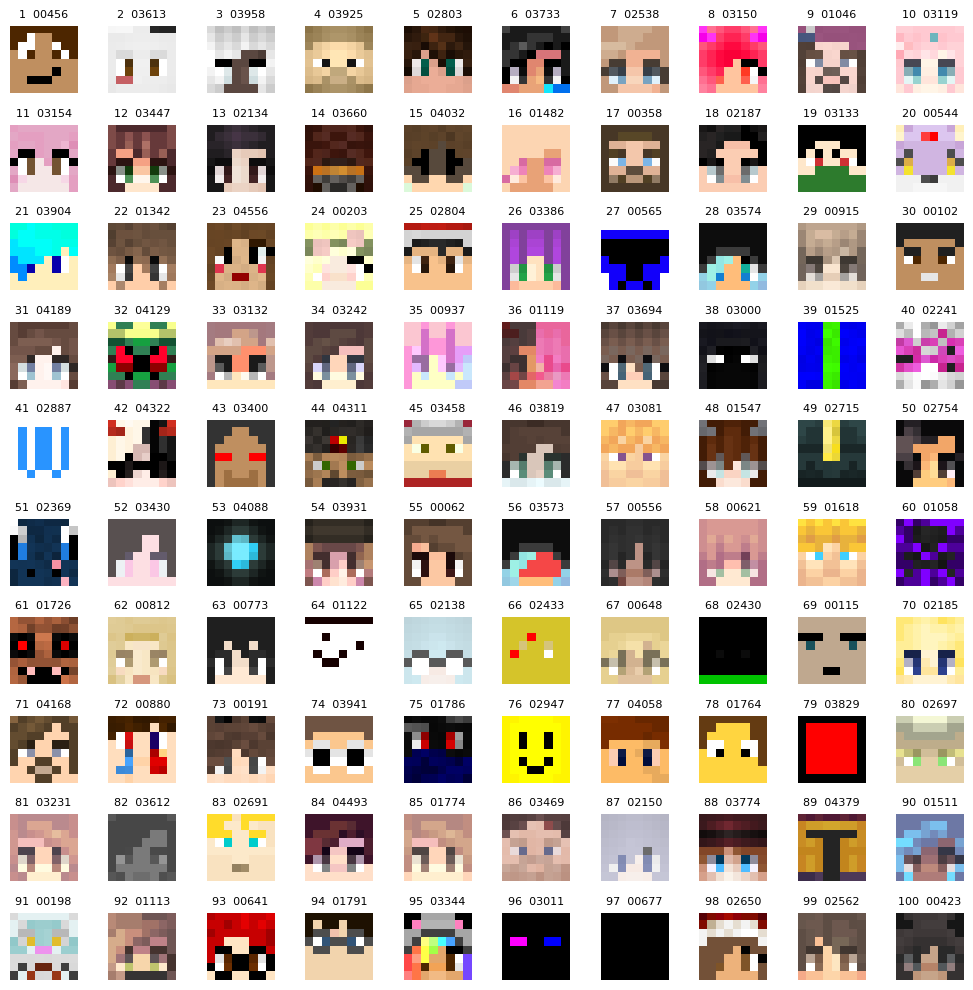

In [ ]:
plot_images(all_faces[:100])

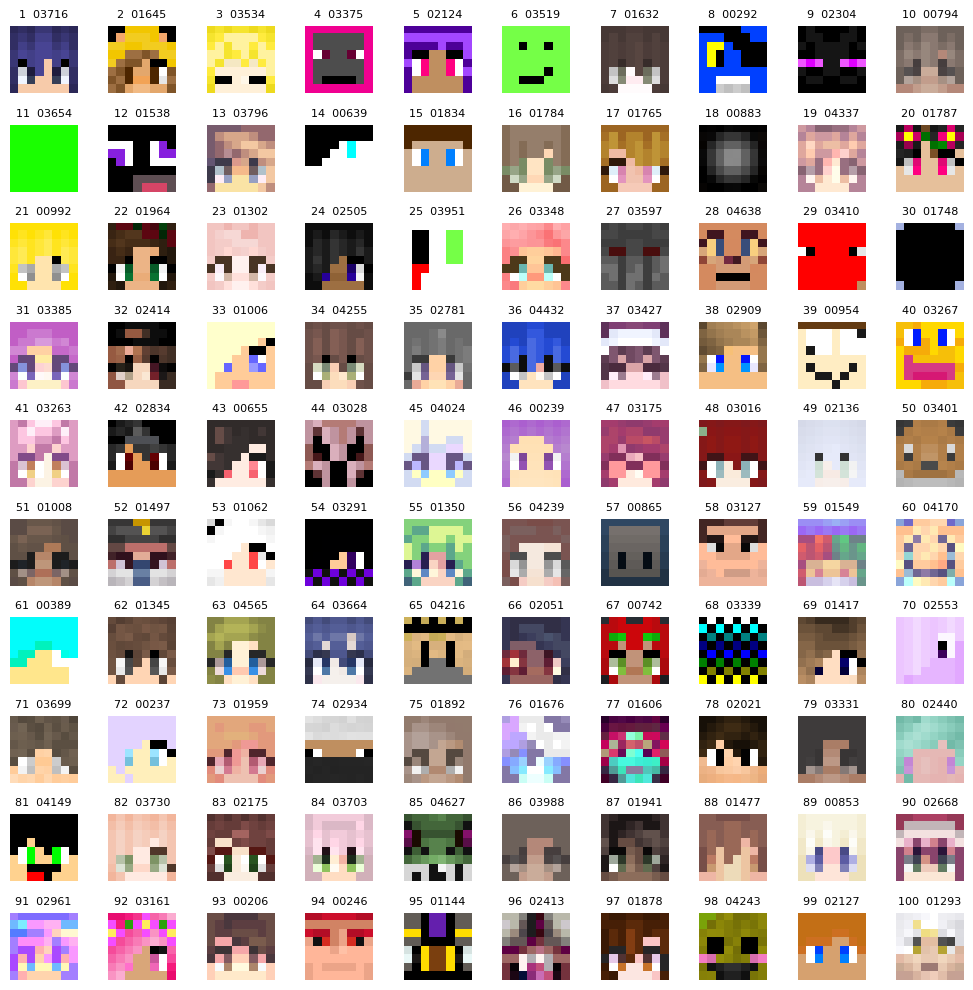

In [ ]:
plot_images(all_faces[100:200])

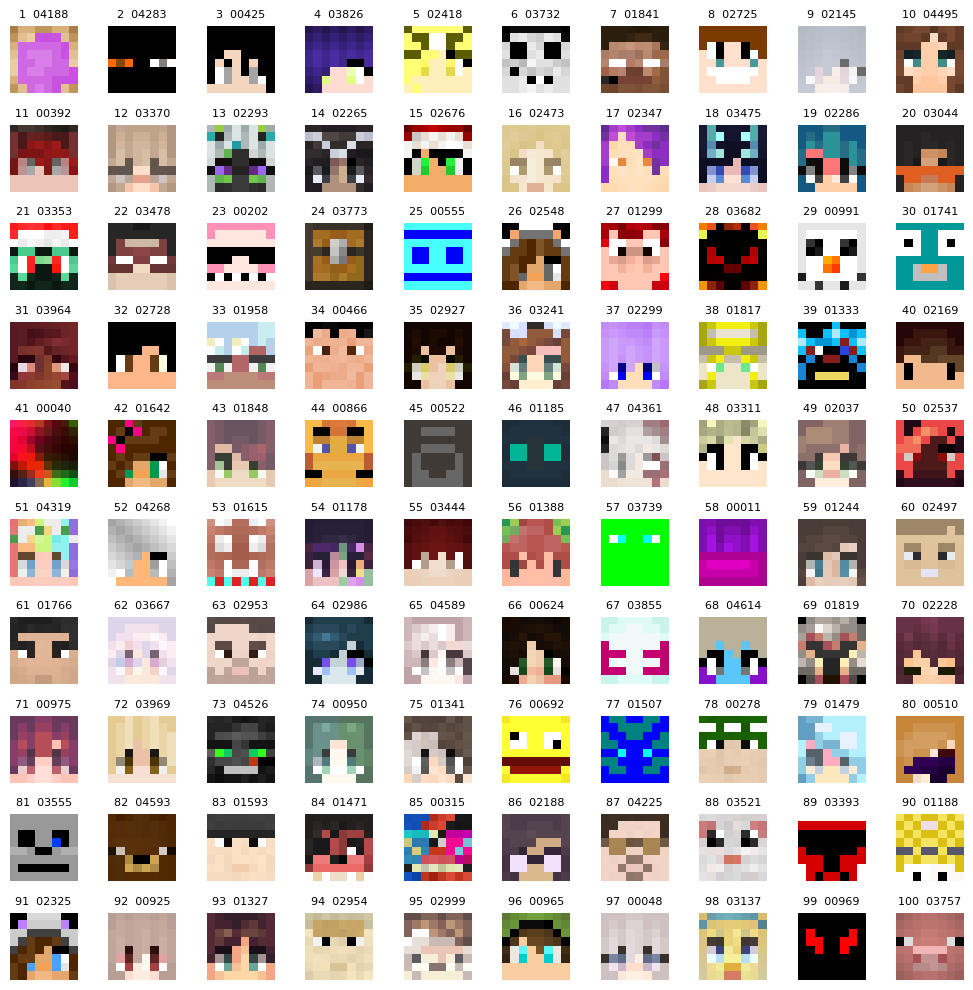

In [ ]:
plot_images(all_faces[200:300])

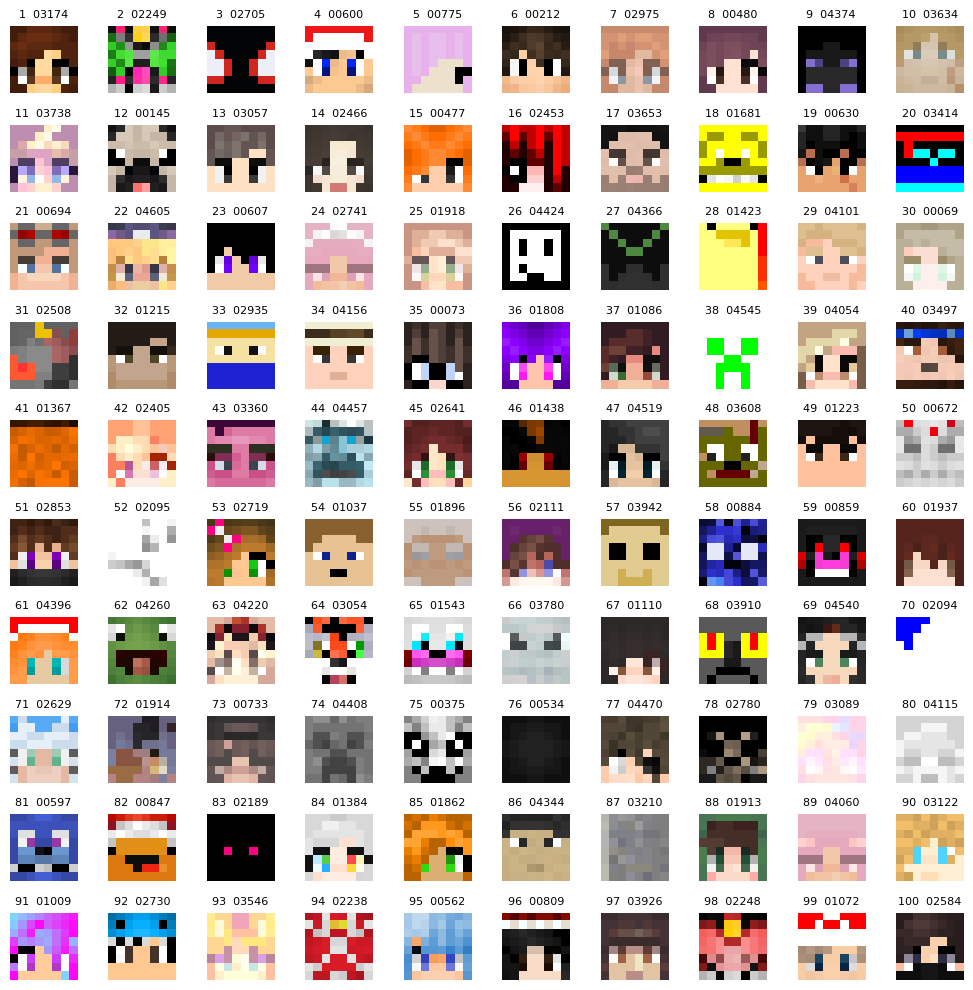

In [ ]:
plot_images(all_faces[300:400])

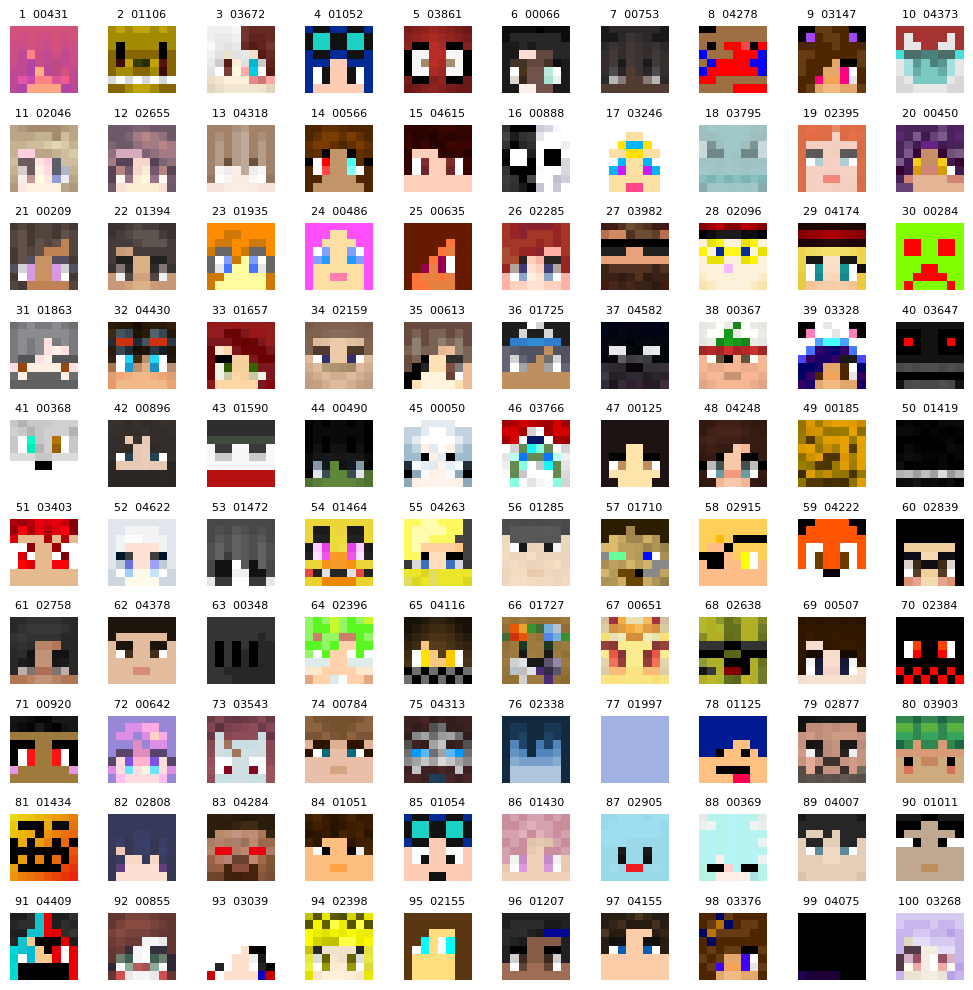

In [ ]:
plot_images(all_faces[400:500])

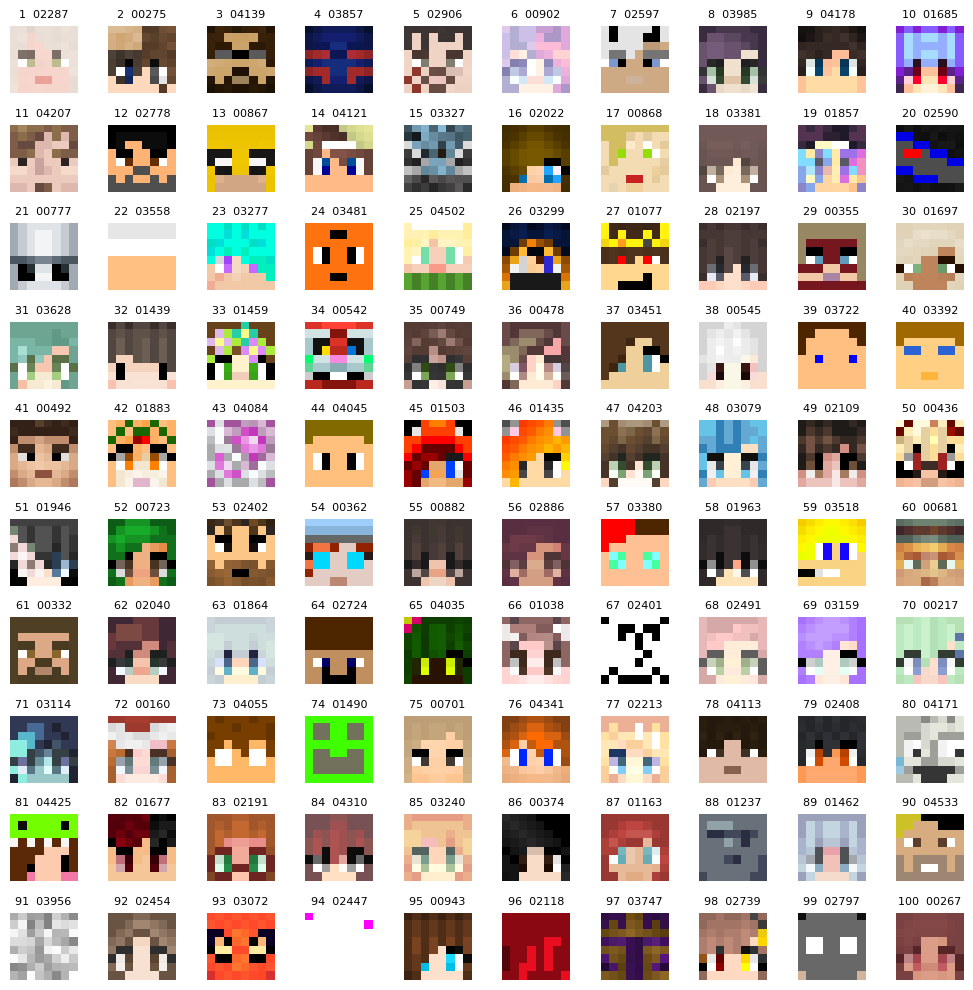

In [ ]:
plot_images(all_faces[500:600])

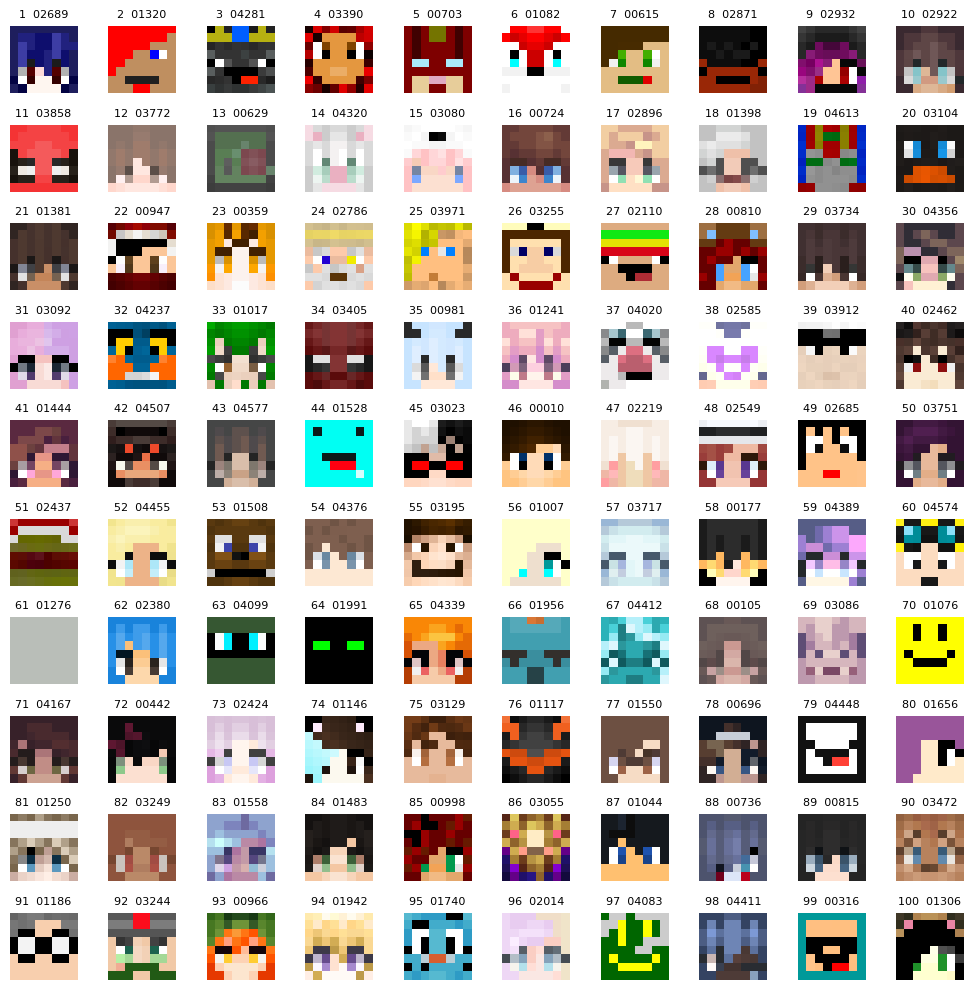

In [ ]:
plot_images(all_faces[600:700])

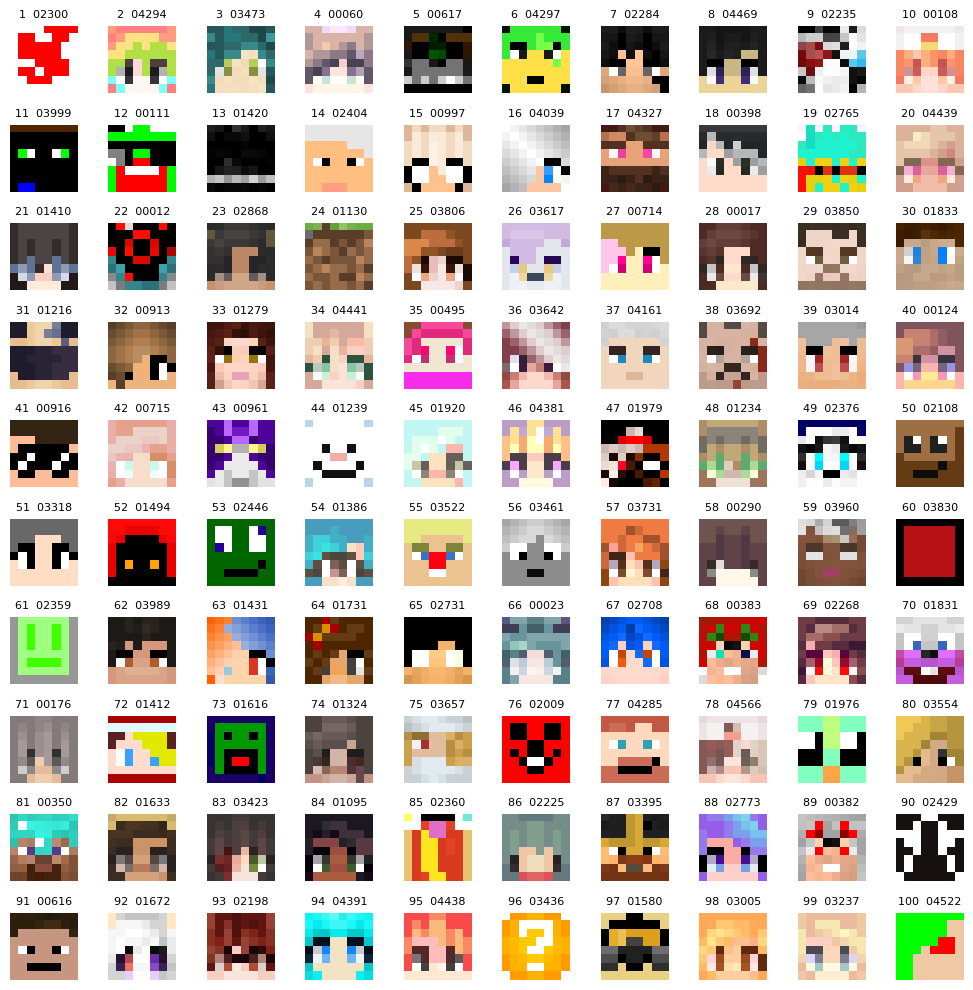

In [ ]:
plot_images(all_faces[700:800])

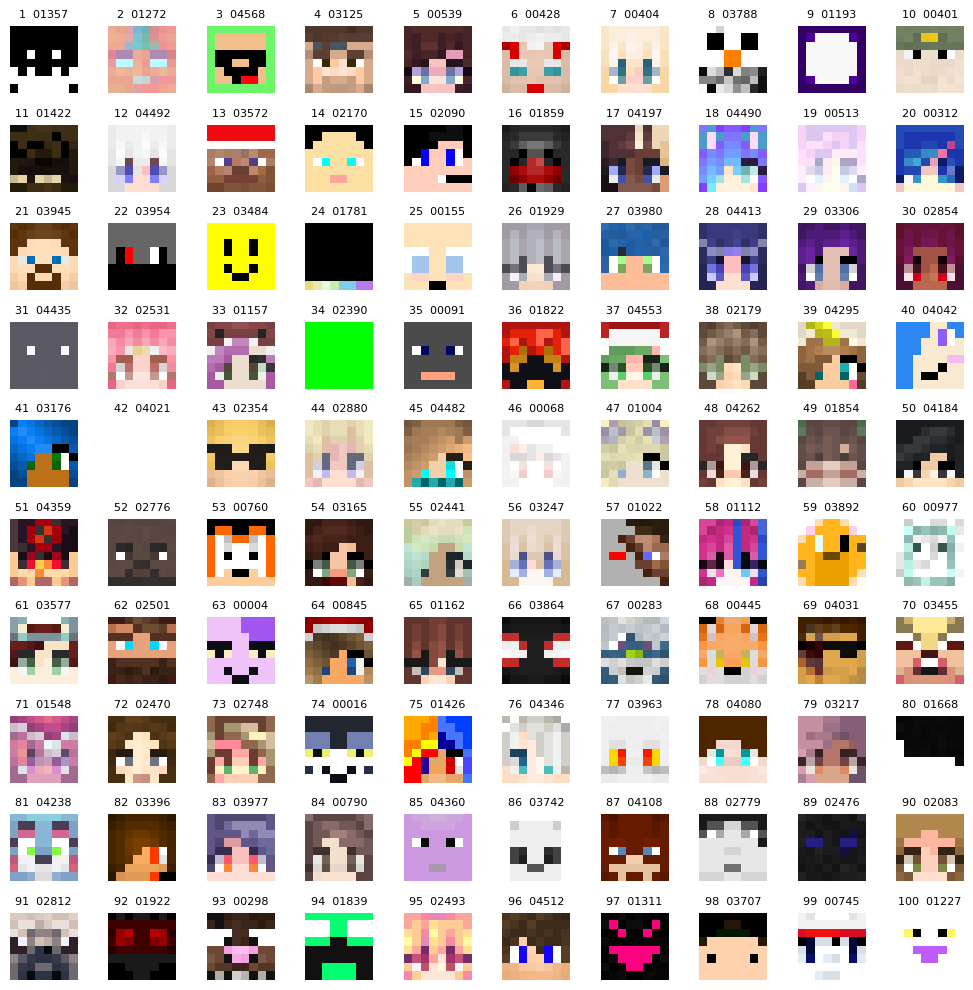

In [ ]:
plot_images(all_faces[800:900])

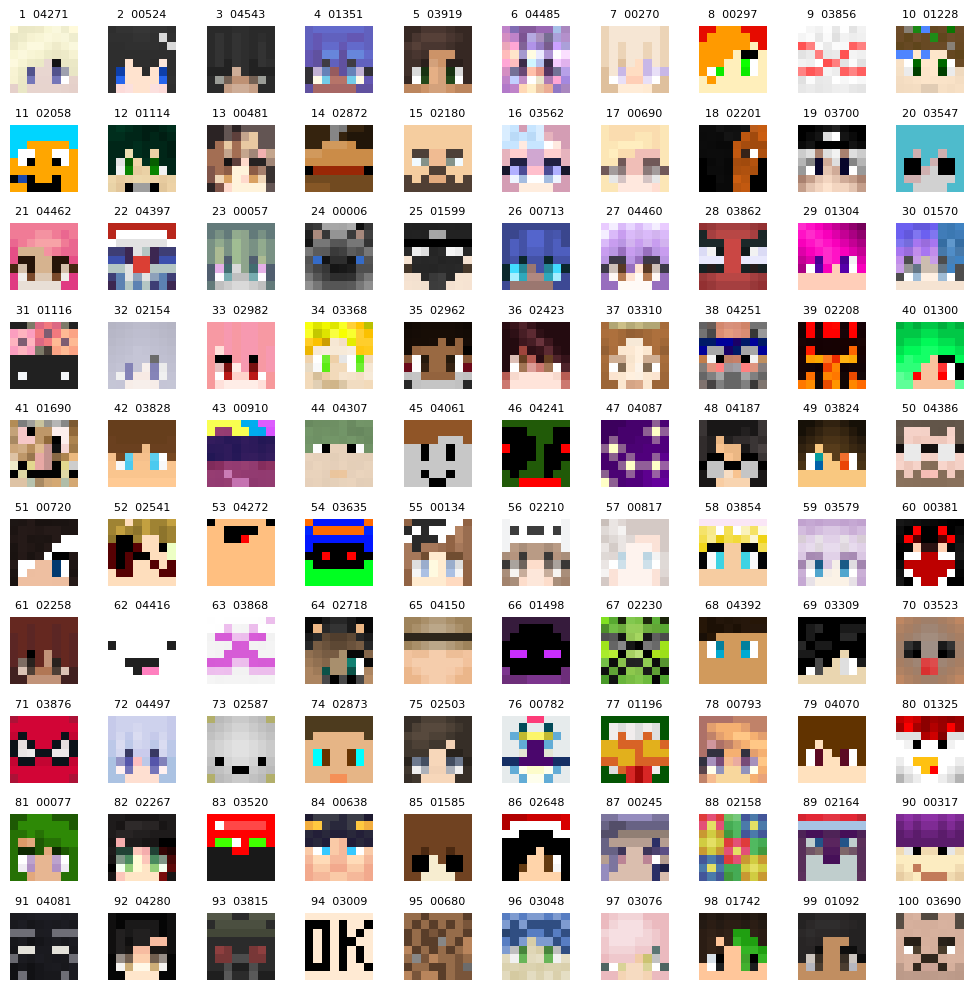

In [ ]:
plot_images(all_faces[900:1000])

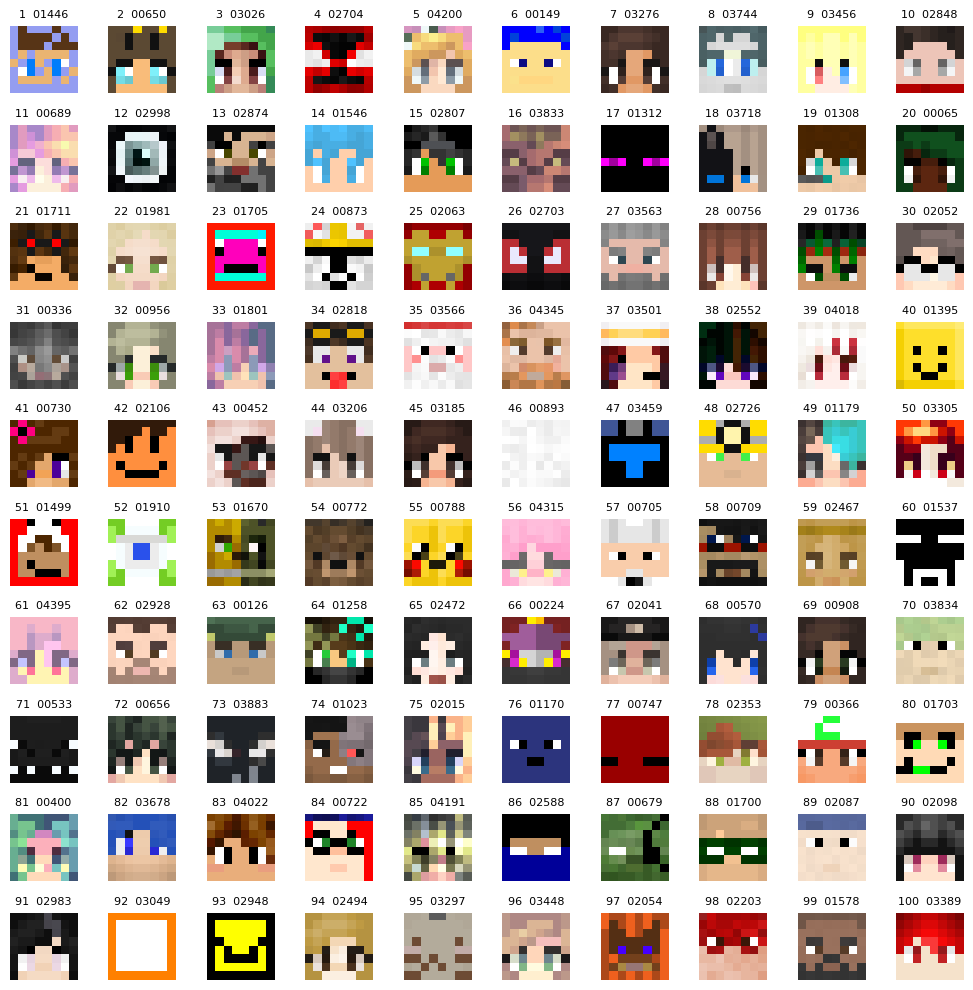

In [ ]:
plot_images(all_faces[1000:1100])

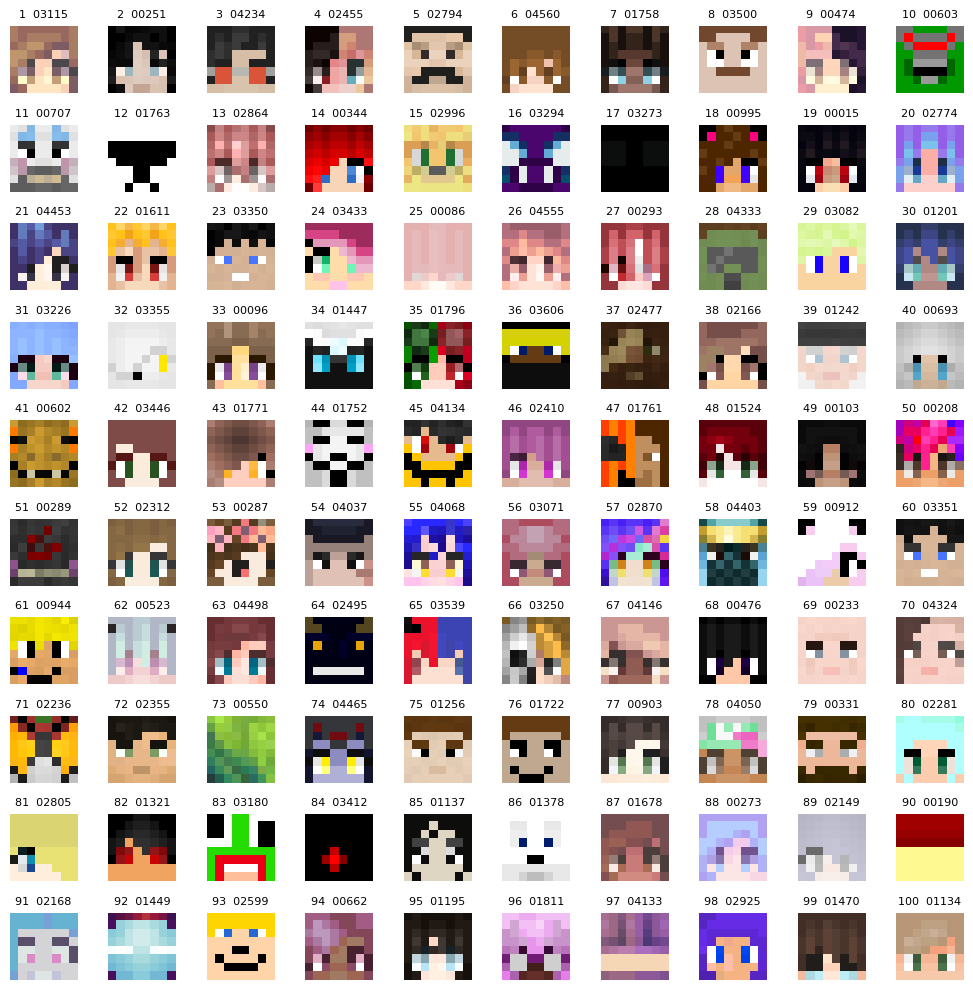

In [ ]:
plot_images(all_faces[1100:1200])

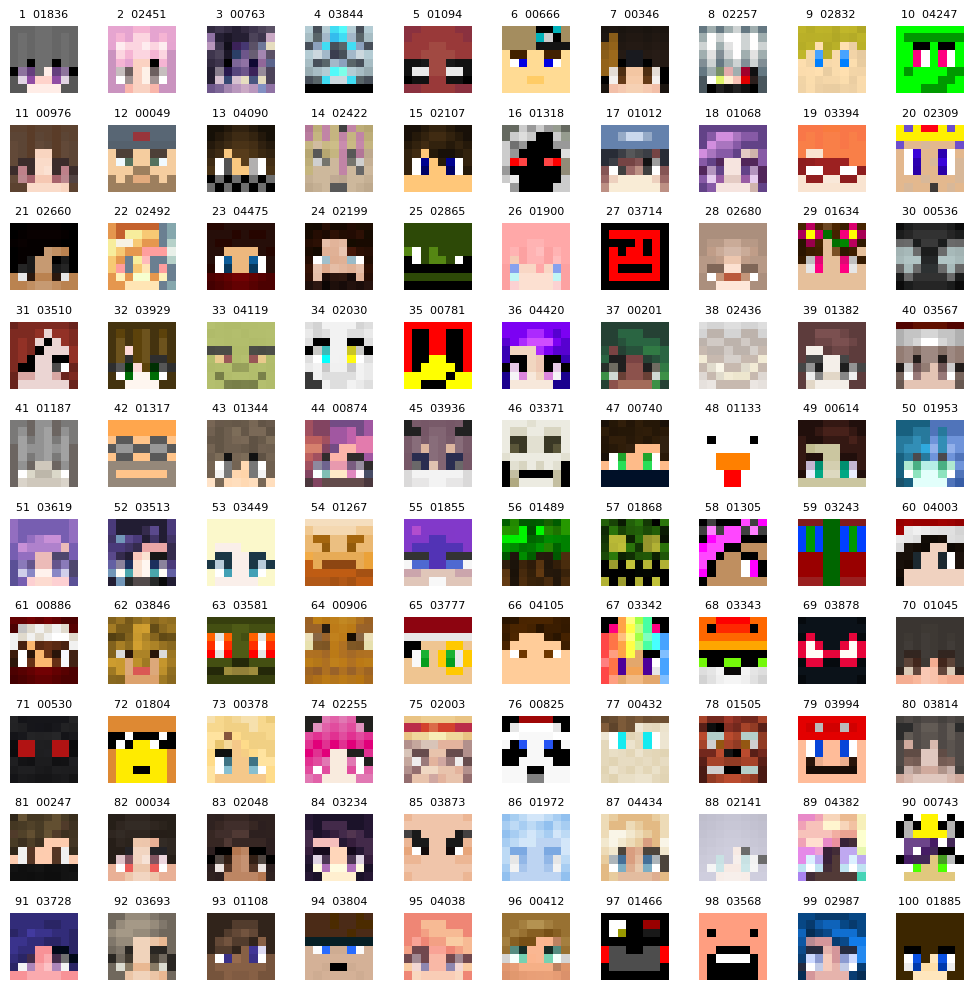

In [ ]:
plot_images(all_faces[1200:1300])

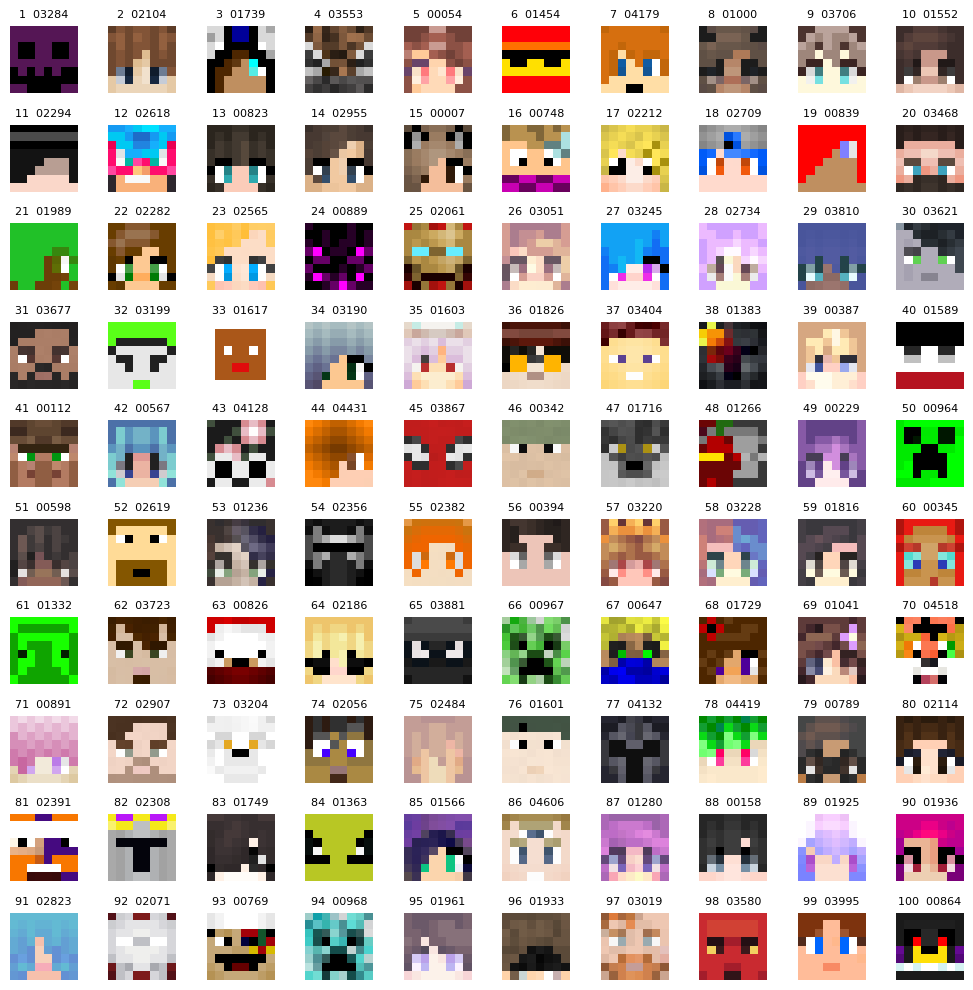

In [ ]:
plot_images(all_faces[1300:1400])

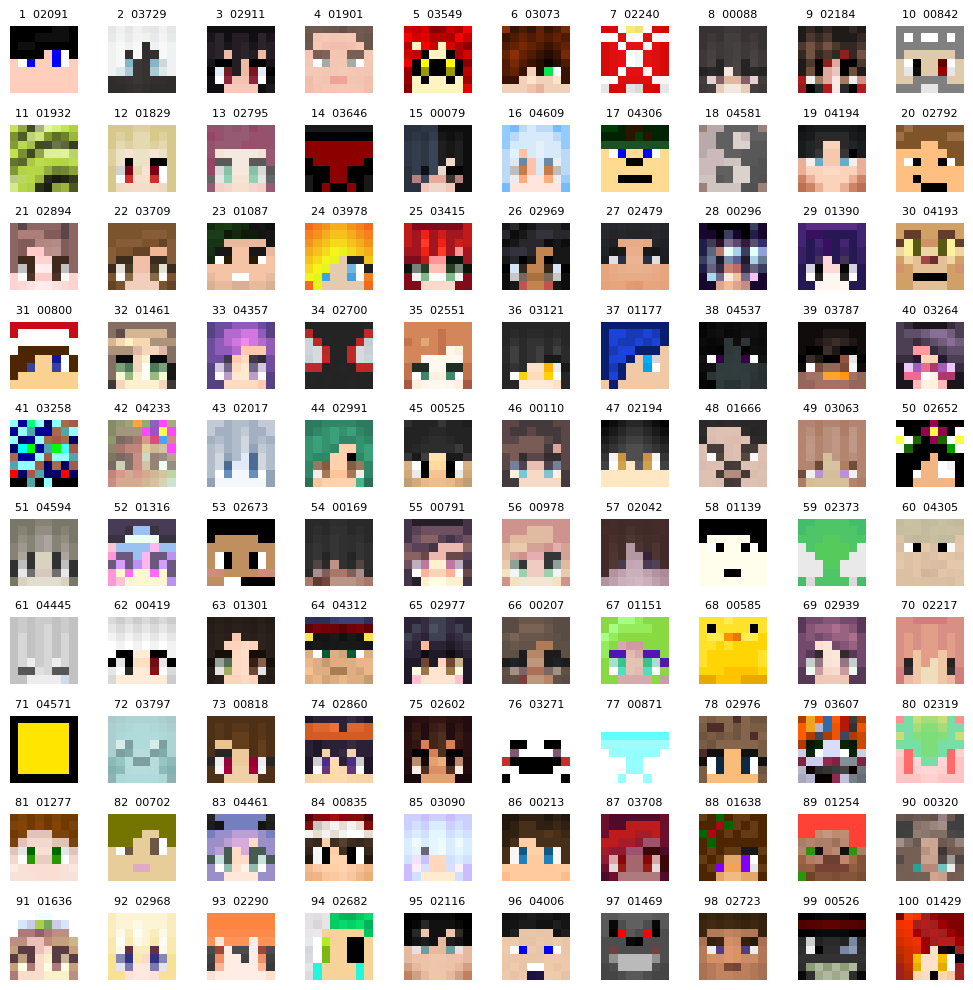

In [ ]:
plot_images(all_faces[1400:1500])

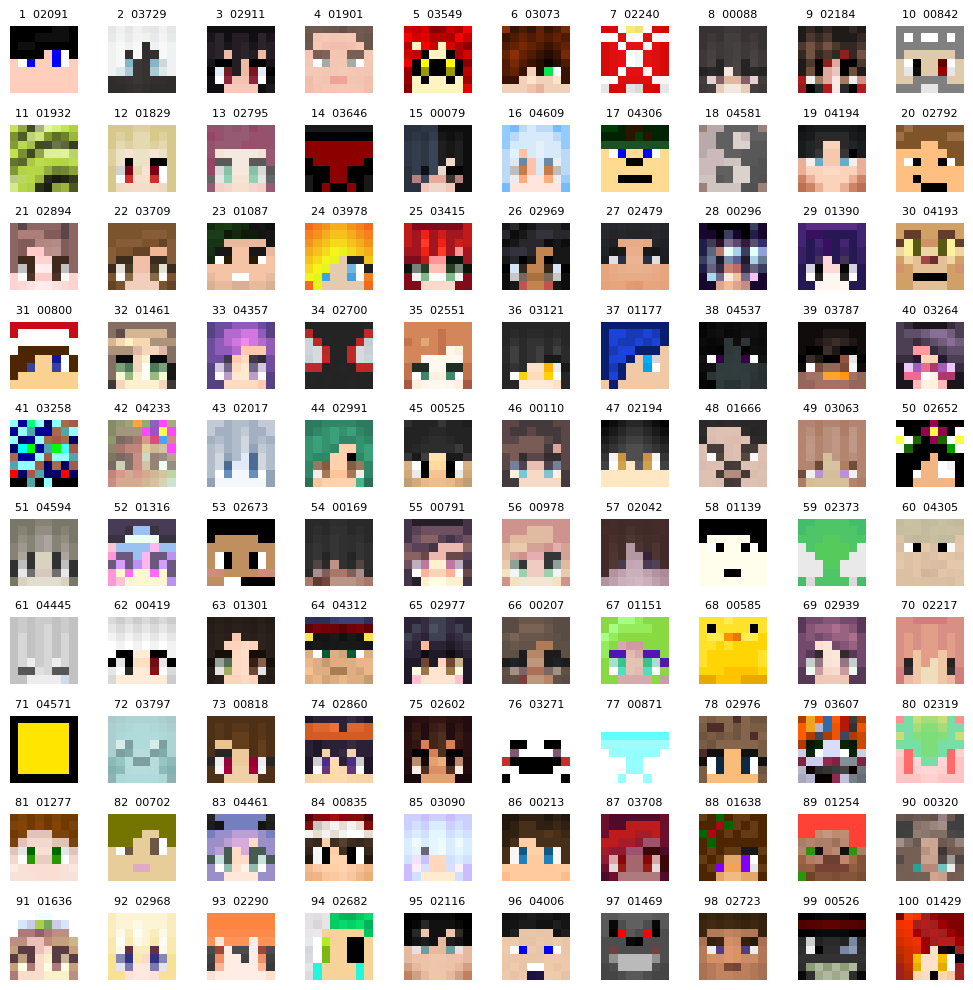

In [ ]:
plot_images(all_faces[1500:1600])

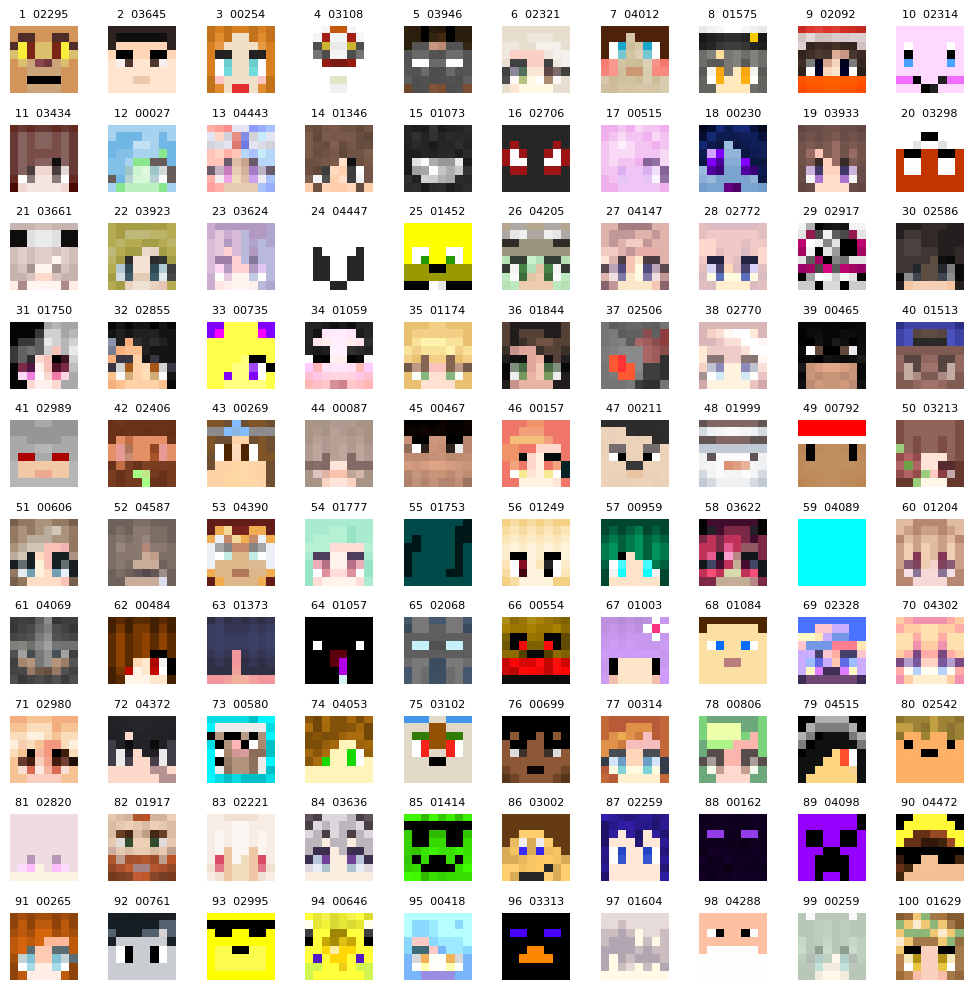

In [4]:
plot_images(all_faces[1600:1700])

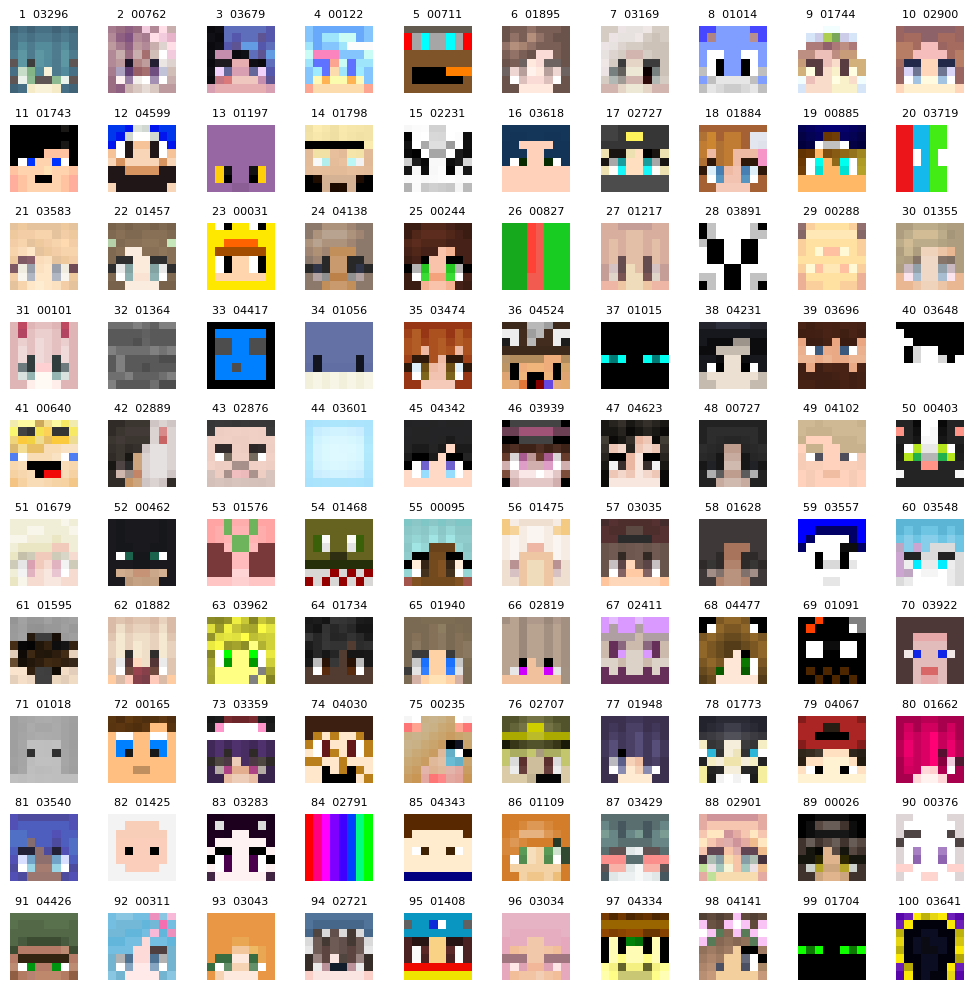

In [5]:
plot_images(all_faces[1700:1800])

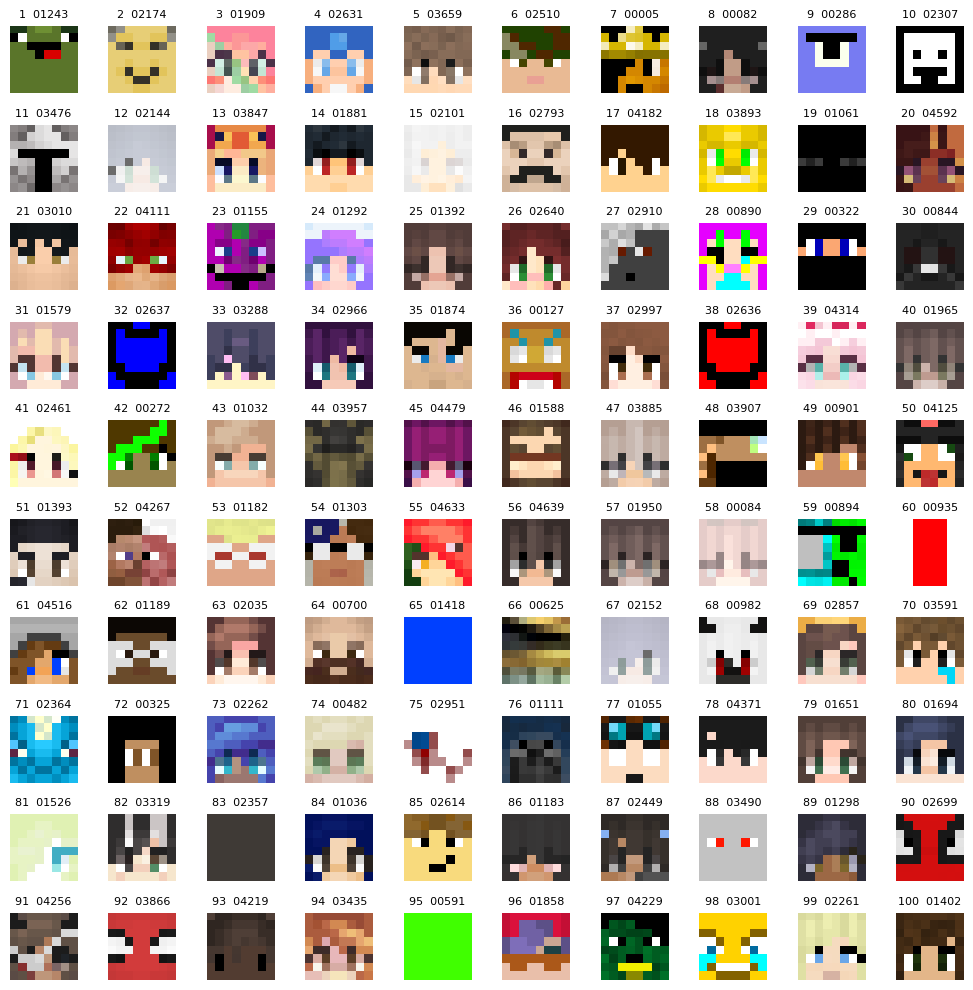

In [6]:
plot_images(all_faces[1800:1900])

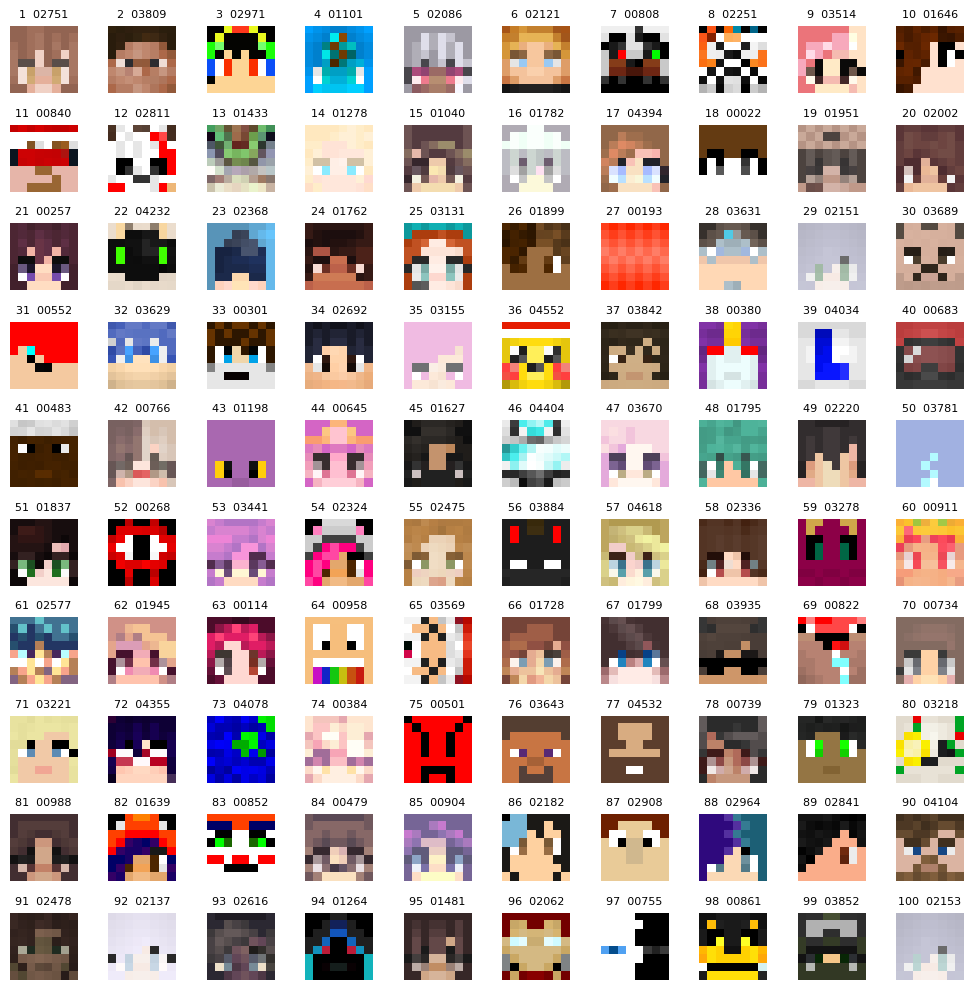

In [7]:
plot_images(all_faces[1900:2000])

In [3]:
labels_str = ""
labels_str += "1001111111111000110011101101111001101000001111110101011011100110001001101100110111111111010000100111"
labels_str += "1100101001001001101111110100001111111100111011110010101101000111011010111010011011110110001110001001"
labels_str += "0011101111100111111000000100001111111001011000011011011000111011110000100110001000100000001110011000"
labels_str += "1001011101101110101011111000100101011011011010101010110100001010001010101000000001011101111110111011"
labels_str += "0001001010111110101111111100101111110110010000110001001100001100000010110100011100111100111101111101"
labels_str += "1110111111110101111000101111101100011100110011111001111101111110110111010011111001111110110100100101"
labels_str += "1000001011010001110011100011111000110011111001011101011100110100100000101110110011111010110110010001"
labels_str += "0111001101000011110110101011110111011111010011001000001110100111111110110100010111010011101001100110"
labels_str += "0101100001011110111010000111110110001110101110110101011101001101100010011011011001110000010000110000"
labels_str += "1011111101111011101010100110110111011001010100011100001111101001000100010110011011010110000100010011"
labels_str += "0110111111100110000101000011100101010100110110011100000000101110101010010110011001100000011001010011"
labels_str += "1101111110001110011111100100101010100111011001010101010100011010001111010111111100000011100001000101"
labels_str += "0000011000011010110110110000100100011011011100101111010000011000111001001110000011111110001111110011"
labels_str += "0100101111001111010101100111111001001000110001001011101111110100000110110001010100001111010000101010"
labels_str += "1011000000011011101111111110101110100110011111111011001100010111101010001110010011110111111000110100"
labels_str += "1111010111011011101111111111101110111110011111111111111101010111111010001110010011111111011100110101"
labels_str += "0110011110111100111001100111011111110111011011100110010110010100000101110101111101010100001100100001"
labels_str += "0011010011100001111011011010111000110110101010111010001011010111110100011010100010100101101110110100"
labels_str += "0111111000001101110110011100001011101011011010001110001100001011000011000000011101011010000001000011"
labels_str += "1110010011000111111110010100010001101000100100010010111011010110011001100001111011001011111010000000"

In [4]:
label_list = [int(char) for char in labels_str]
labeled_faces = all_faces[:len(label_list)]

## Data augmentation

Copy the labeled faces into `SAMPLE_FACE_DIR` path

In [6]:
if not os.path.isdir(SAMPLE_FACE_DIR):
    os.mkdir(SAMPLE_FACE_DIR)

for i, labeled_face_path in enumerate(labeled_faces):
    name = labeled_face_path.split("/")[-1]
    new_path = join(SAMPLE_FACE_DIR, name)

    shutil.copy(labeled_face_path, new_path)

    labeled_faces[i] = new_path

del i, labeled_face_path

Save flipped version of valid faces if they're not symmetric

In [7]:
flipped_faces = []
flipped_labels = []

for i, label in enumerate(label_list):
    if not label:
        continue

    curr_face_img = np.array(Image.open(labeled_faces[i]))
    flipped = np.flip(curr_face_img, axis=1)

    if not (curr_face_img == flipped).all():
        # new name
        name = labeled_faces[i]
        name = name.split("/")[-1]
        name = name.split(".")[0]
        new_name = join(SAMPLE_FACE_DIR, name + "_flipped.png")

        # save
        Image.fromarray(flipped).save(new_name)

        # append to arrays
        flipped_faces.append(new_name)
        flipped_labels.append(label)

labeled_faces.extend(flipped_faces)
label_list.extend(flipped_labels)

print(f"flipped {len(flipped_labels)} faces")

del (
    i,
    label,
    flipped_faces,
    flipped_labels,
    curr_face_img,
    flipped,
    name,
    new_name,
)

flipped 1048 faces


Generate random images and label as 0

In [8]:
num_arrays = 500

for _ in range(num_arrays):
    random_array = np.random.randint(0, 256, size=(8, 8, 3), dtype=np.uint8)
    name = join(SAMPLE_FACE_DIR, f"random_{_}.png")

    # save
    Image.fromarray(random_array).save(name)

    # append to arrays
    labeled_faces.append(name)
    label_list.append(0)

print(f"generated {num_arrays} random images")

del _, num_arrays, random_array, name

generated 500 random images


## Save result

In [9]:
np.savez(SAMPLES_PATH, faces=labeled_faces, labels=label_list)
print(f"saved {len(label_list)} samples")

saved 3548 samples
